In [39]:
import pandas as pd
import time
import datetime


In [49]:
df = pd.read_json('anyscale-1697499992_raw.json')

In [50]:
# This is the standard analysis we would do in the real script

print('Validity results:')
print(df['valid'].value_counts())
cdf = df[df.valid !='Exception'].copy()
print(f'Clean DF is: {len(cdf)}')
cdf['inter_tokens_delay'] = cdf.total_time/cdf.tokens_out
cdf['total_tokens_per_s'] = (cdf.tokens_out + cdf.tokens_in)/cdf.total_time
cdf['out_tokens_per_s'] = cdf.tokens_out/cdf.total_time
mean_tokens_in = cdf['tokens_in'].mean() 
mean_tokens_out = cdf['tokens_out'].mean() 
mean_ttft = cdf['ttft'].mean()
gt_3_ttft = len(cdf[cdf['ttft'] > 3])/len(cdf)
print(f'Mean TTFT: {mean_ttft*1000:.0f} ms (mean tokens in: {mean_tokens_in:.0f}, out: {mean_tokens_out:.0f})')
print(f'TTFT > 3 s: {gt_3_ttft*100:.2f}%')
print(f'ITL (out): {cdf.inter_tokens_delay.mean()*1000:.2f} ms/token, mean tokens/s output (out): {cdf.out_tokens_per_s.mean():.2f} token/s')


Validity results:
Exception    419
OK           181
Name: valid, dtype: int64
Clean DF is: 181
Mean TTFT: 2209 ms (mean tokens in: 512, out: 138)
TTFT > 3 s: 24.86%
ITL (out): 77.51 ms/token, mean tokens/s output (out): 12.93 token/s


In [51]:
len(cdf)

181

<Axes: xlabel='tokens_in', ylabel='ttft'>

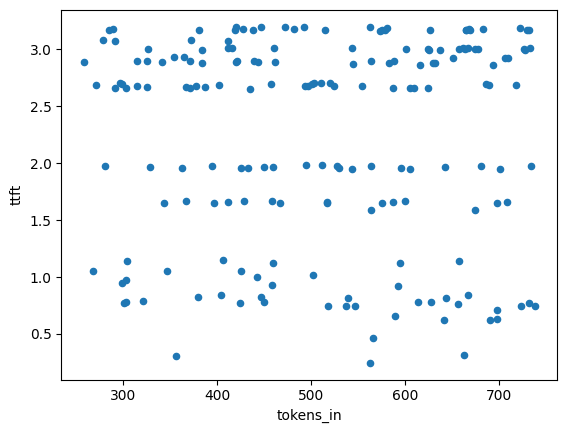

In [52]:
cdf.plot.scatter(y='ttft', x='tokens_in')

<Axes: xlabel='tokens_out', ylabel='total_time'>

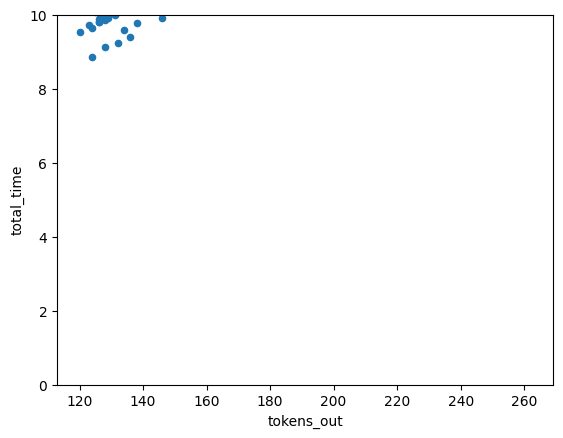

In [53]:
cdf.plot.scatter(y='total_time', x='tokens_out', ylim=[0,10])

In [54]:
cdf.describe()

,ttft,total_time,tokens_in,tokens_out,inter_tokens_delay,total_tokens_per_s,out_tokens_per_s
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2.209350,10.661870,511.988950,137.944751,0.077509,61.123584,12.934065
std,0.910844,0.810370,136.905198,14.281971,0.003850,12.982601,0.658547
min,0.246783,8.863190,258.000000,120.000000,0.064592,33.386163,11.382172
25%,1.646696,10.251724,404.000000,131.000000,0.075630,50.126811,12.559732
50%,2.675371,10.556036,517.000000,136.000000,0.077166,63.105083,12.959061
75%,2.998175,10.958826,630.000000,140.000000,0.079620,71.557239,13.222181
max,3.198518,16.923179,738.000000,262.000000,0.087857,84.330612,15.481725


<Axes: ylabel='Frequency'>

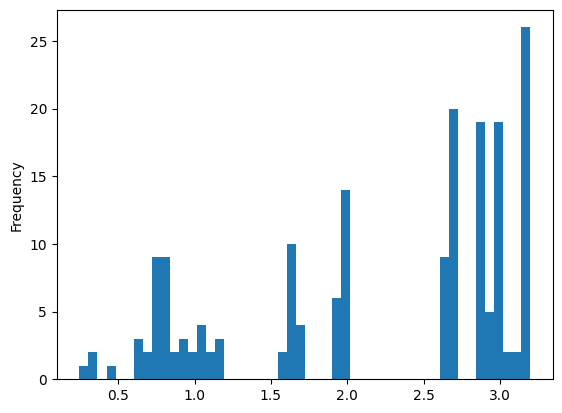

In [55]:
cdf['ttft'].plot.hist(bins=50)

In [56]:
list(df[df['valid'] == 'OK']['cause'].to_numpy())

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']